In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	365241.9143

Best Fitness:	49804.8284
Solution:	100.0000
Diff:		49704.8284

[0:01:55][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	358950.5471

Best Fitness:	74971.5368
Solution:	100.0000
Diff:		74871.5368

[0:03:40][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	175576.4071

Best Fitness:	45726.4643
Solution:	100.0000
Diff:		45626.4643

[0:05:26][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	822538.6973

Best Fitness:	197225.2838
Solution:	100.0000
Diff:		197125.2838

[0:07:11][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	386164.7315

Best Fitness:	95566.6606
Solution:	100.0000
Diff:		95466.6606

[0:08:54][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	149965.5798

Best Fitness:	40420.9284
Solution:	100.0000
Diff:		40320.9284

[0:10:39][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	169842.7242

Best Fitness:	33432.5378
Solution:	100.0000
Diff:		33332.5378

[0:12:24][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	313155.4374

Best Fitness:	55804.4087
Solution:	100.0000
Diff:		55704.4087

[0:14:08][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	320312.7142

Best Fitness:	59832.1586
Solution:	100.0000
Diff:		59732.1586

[0:15:52][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	319642.0810

Best Fitness:	35218.1183
Solution:	100.0000
Diff:		35118.1183

[0:17:35][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	415396.0836

Best Fitness:	74315.3769
Solution:	100.0000
Diff:		74215.3769

[0:19:21][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	395535.3248

Best Fitness:	71948.1937
Solution:	100.0000
Diff:		71848.1937

[0:21:05][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	236863.2565

Best Fitness:	36549.6514
Solution:	100.0000
Diff:		36449.6514

[0:22:52][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	177496.1371

Best Fitness:	36084.1473
Solution:	100.0000
Diff:		35984.1473

[0:24:38][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	525866.6067

Best Fitness:	76355.3615
Solution:	100.0000
Diff:		76255.3615

[0:26:22][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	357343.3308

Best Fitness:	63513.8556
Solution:	100.0000
Diff:		63413.8556

[0:28:01][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	377760.6414

Best Fitness:	85481.9592
Solution:	100.0000
Diff:		85381.9592

[0:29:35][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	264163.4265

Best Fitness:	57174.1397
Solution:	100.0000
Diff:		57074.1397

[0:31:08][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	824184.3458

Best Fitness:	83203.9429
Solution:	100.0000
Diff:		83103.9429

[0:32:41][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	286160.8594

Best Fitness:	59702.8978
Solution:	100.0000
Diff:		59602.8978

[0:34:15][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	685782.9418

Best Fitness:	162647.8862
Solution:	100.0000
Diff:		162547.8862

[0:35:48][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	402832.5921

Best Fitness:	88374.5912
Solution:	100.0000
Diff:		88274.5912

[0:37:22][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	725548.2558

Best Fitness:	135003.7453
Solution:	100.0000
Diff:		134903.7453

[0:38:57][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	375569.0793

Best Fitness:	90150.0092
Solution:	100.0000
Diff:		90050.0092

[0:40:30][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	705393.2829

Best Fitness:	88439.8569
Solution:	100.0000
Diff:		88339.8569

[0:42:02][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	267795.6595

Best Fitness:	65801.9344
Solution:	100.0000
Diff:		65701.9344

[0:43:36][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	366473.5932

Best Fitness:	66331.3210
Solution:	100.0000
Diff:		66231.3210

[0:45:09][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	328138.6316

Best Fitness:	79676.4707
Solution:	100.0000
Diff:		79576.4707

[0:46:43][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	499795.6522

Best Fitness:	72090.1904
Solution:	100.0000
Diff:		71990.1904

[0:48:17][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	276877.0604

Best Fitness:	66488.9780
Solution:	100.0000
Diff:		66388.9780

[0:49:55][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	425641.9366

Best Fitness:	111511.9881
Solution:	100.0000
Diff:		111411.9881

[0:51:33][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	317513.6609

Best Fitness:	43527.3785
Solution:	100.0000
Diff:		43427.3785

[0:53:08][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	415032.0879

Best Fitness:	71566.5130
Solution:	100.0000
Diff:		71466.5130

[0:54:42][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	276026.3287

Best Fitness:	60150.4861
Solution:	100.0000
Diff:		60050.4861

[0:56:18][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	283211.4382

Best Fitness:	69381.8932
Solution:	100.0000
Diff:		69281.8932

[0:57:44][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	182447.4590

Best Fitness:	42713.3696
Solution:	100.0000
Diff:		42613.3696

[0:59:08][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	350986.2448

Best Fitness:	83632.3957
Solution:	100.0000
Diff:		83532.3957

[1:00:32][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	408936.3503

Best Fitness:	104121.0582
Solution:	100.0000
Diff:		104021.0582

[1:01:55][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	384710.0213

Best Fitness:	64783.8638
Solution:	100.0000
Diff:		64683.8638

[1:03:20][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	233296.4680

Best Fitness:	42452.1326
Solution:	100.0000
Diff:		42352.1326

[1:04:43][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	423200.8267

Best Fitness:	86158.9952
Solution:	100.0000
Diff:		86058.9952

[1:06:08][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	399959.3947

Best Fitness:	56715.8727
Solution:	100.0000
Diff:		56615.8727

[1:07:32][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	255927.6001

Best Fitness:	59881.5384
Solution:	100.0000
Diff:		59781.5384

[1:08:57][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	580044.0466

Best Fitness:	99721.2368
Solution:	100.0000
Diff:		99621.2368

[1:10:21][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	442874.0286

Best Fitness:	110207.4002
Solution:	100.0000
Diff:		110107.4002

[1:11:45][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	491373.2451

Best Fitness:	77151.9002
Solution:	100.0000
Diff:		77051.9002

[1:13:10][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	558138.7117

Best Fitness:	144252.9169
Solution:	100.0000
Diff:		144152.9169

[1:14:34][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	206613.7586

Best Fitness:	53441.2103
Solution:	100.0000
Diff:		53341.2103

[1:15:58][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	427710.1351

Best Fitness:	86179.2774
Solution:	100.0000
Diff:		86079.2774

[1:17:21][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	462333.0551

Best Fitness:	96458.2095
Solution:	100.0000
Diff:		96358.2095

[1:18:45][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	354946.8109

Best Fitness:	68202.0900
Solution:	100.0000
Diff:		68102.0900

[1:20:13][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

1:20:13

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,470931.892206,562391.789246,345755.85250,408437.746394,551643.548253,533793.470192,308901.804657,322893.324396,164341.933477,334760.625799,...,653507.335083,371366.56956,168794.66916,458782.115217,822610.508448,498410.967401,220610.857942,489872.188578,581879.791296,50
94,470931.892206,562391.789246,116425.77328,408437.746394,551643.548253,533793.470192,308901.804657,322893.324396,164341.933477,334760.625799,...,570393.202511,371366.56956,168794.66916,458782.115217,822610.508448,498410.967401,220610.857942,489872.188578,581879.791296,50
95,470931.892206,562391.789246,116425.77328,372375.865289,538585.998810,533793.470192,308901.804657,128059.327262,164341.933477,316067.908528,...,505009.297906,371366.56956,168794.66916,340881.226710,822610.508448,498410.967401,220610.857942,489872.188578,384972.643234,50
96,470931.892206,562391.789246,116425.77328,372375.865289,538585.998810,425563.586985,308901.804657,128059.327262,164341.933477,316067.908528,...,505009.297906,371366.56956,168794.66916,340881.226710,822610.508448,498410.967401,220610.857942,447116.238531,384972.643234,50
97,470931.892206,518171.732299,116425.77328,372375.865289,538585.998810,425563.586985,308901.804657,128059.327262,164341.933477,202693.072368,...,178630.556902,371366.56956,168794.66916,340881.226710,822610.508448,498410.967401,220610.857942,447116.238531,384972.643234,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 49704.82838787504

Best error for run 1: 74871.53676169491

Best error for run 2: 45626.464259065244

Best error for run 3: 197125.28375652502

Best error for run 4: 95466.66059631841

Best error for run 5: 40320.92844987773

Best error for run 6: 33332.537847020496

Best error for run 7: 55704.40865114782

Best error for run 8: 59732.15862954198

Best error for run 9: 35118.11832688727

Best error for run 10: 74215.37690200943

Best error for run 11: 71848.19368576087

Best error for run 12: 36449.65140075102

Best error for run 13: 35984.147285708226

Best error for run 14: 76255.36147171991

Best error for run 15: 63413.85560337847

Best error for run 16: 85381.95923519929

Best error for run 17: 57074.13965251176

Best error for run 18: 83103.94286682545

Best error for run 19: 59602.897811717274

Best error for run 20: 162547.88619604477

Best error for run 21: 88274.59119244182

Best error for run 22: 134903.74533687354

Best error for run 23: 90050.00921898976

Best error for run 24: 88339.85689935964

Best error for run 25: 65701.93436924346

Best error for run 26: 66231.32098653159

Best error for run 27: 79576.47069362269

Best error for run 28: 71990.1904308087

Best error for run 29: 66388.97796113949

Best error for run 30: 111411.98811723392

Best error for run 31: 43427.378498533326

Best error for run 32: 71466.51300049567

Best error for run 33: 60050.48611082224

Best error for run 34: 69281.89316499824

Best error for run 35: 42613.36964200813

Best error for run 36: 83532.39571176041

Best error for run 37: 104021.05823736315

Best error for run 38: 64683.86382460105

Best error for run 39: 42352.13262763055

Best error for run 40: 86058.99524255688

Best error for run 41: 56615.872740903826

Best error for run 42: 59781.53839388552

Best error for run 43: 99621.23678150799

Best error for run 44: 110107.40020256271

Best error for run 45: 77051.90017739894

Best error for run 46: 144152.91688630896

Best error for run 47: 53341.21034249758

Best error for run 48: 86079.27735628477

Best error for run 49: 96358.20948609934

Best error for run 50: 68102.09000147448

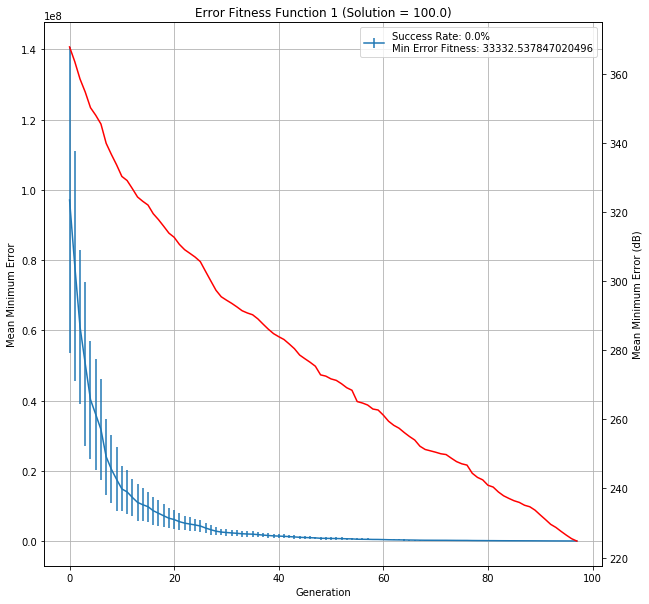

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.3,49704.828388,74871.536762,45626.464259,197125.283757,95466.660596,40320.92845,...,110107.400203,77051.900177,144152.916886,53341.210342,86079.277356,96358.209486,68102.090001,75969.5914,1:20:13,30000
